
*   **Name:Pritom Chandra Dey**
*   **Id: 21-44407-1**

*   **section: B**
*   MID Term Assignment-1
IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN
(L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION










In [9]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git


fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


In [10]:
import os
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
Data_Test=('CIFAR-10-images/test')
catagories_test=os.listdir(Data_Test)
print(catagories_test)


['deer', 'horse', 'automobile', 'airplane', 'dog', 'truck', 'ship', 'cat', 'frog', 'bird']


In [11]:
Test_DATA = []
for c in catagories_test:
  path = os.path.join(Data_Test, c)
  for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr,(32,32))
        Test_DATA.append([img_arr_resize,catagories_test.index(c)])

  print(f"Category: {c}, Image Shape: {img_arr.shape}")

100%|██████████| 1000/1000 [00:00<00:00, 22043.84it/s]


Category: deer, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 23478.82it/s]


Category: horse, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 21289.37it/s]


Category: automobile, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 19339.91it/s]


Category: airplane, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 22021.74it/s]


Category: dog, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 19396.43it/s]


Category: truck, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 18575.39it/s]


Category: ship, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 22475.22it/s]


Category: cat, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 21983.30it/s]


Category: frog, Image Shape: (32, 32)


100%|██████████| 1000/1000 [00:00<00:00, 22505.86it/s]

Category: bird, Image Shape: (32, 32)


In [12]:
Test_data_X = []
Test_data_Y = []
for data in Test_DATA:
  Test_data_X.append(data[0])
  Test_data_Y.append(data[1])

In [13]:
X_t=np.array(Test_data_X[:])
y_t=np.array(Test_data_Y[:])

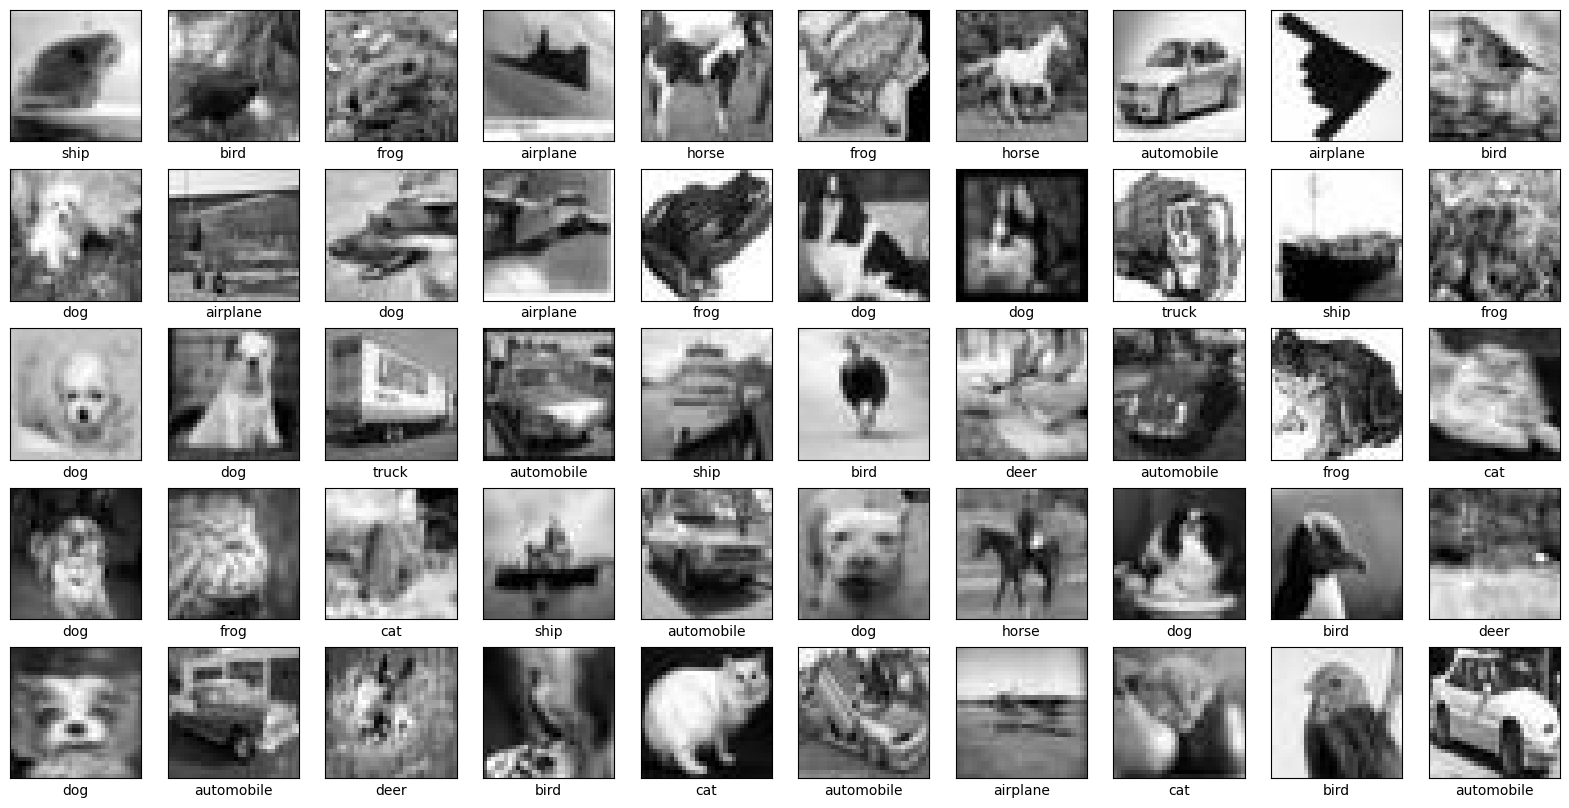

In [14]:
from numpy import random
random.shuffle(Test_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5, 10, i + 1)
    image = Test_DATA[i][0]
    plt.imshow(image, cmap="gray")
    plt.xlabel(catagories_test[Test_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i == 49:
        break

plt.show()


In [15]:
def calculate_manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def calculate_euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [16]:
num_folds = 5
fold_size = len(Test_DATA) // num_folds
folds = [Test_DATA[i * fold_size: (i + 1) * fold_size] for i in range(num_folds)]

for i, fold in enumerate(folds):
    print(f"Number of Images in Fold {i + 1}: {len(fold)}")

Number of Images in Fold 1: 2000
Number of Images in Fold 2: 2000
Number of Images in Fold 3: 2000
Number of Images in Fold 4: 2000
Number of Images in Fold 5: 2000


In [17]:
def knn(X_train, y_train, X_val, k, distance_function):
    y_pred = []

    for val_instance in tqdm(X_val, desc=f"Validation, K = {k}", position=0, leave=True):
        distances = []

        for i, train_instance in enumerate(X_train):
            dist = distance_function(val_instance, train_instance)
            distances.append((dist, y_train[i]))

        distances.sort(key=lambda x: x[0])
        k_neighbors = distances[:k]

        neighbor_labels = [neighbor[1] for neighbor in k_neighbors]
        predicted_label = max(set(neighbor_labels), key=neighbor_labels.count)
        y_pred.append(predicted_label)

    return y_pred

In [18]:
k_values = [1,5,9,11,13]
accuracy_dict_manhattan = {k: [] for k in k_values}
accuracy_dict_euclidean = {k: [] for k in k_values}
for distance_function, distance_metric in [(calculate_manhattan_distance, 'Manhattan (L1)'), (calculate_euclidean_distance, 'Euclidean (L2)')]:
    print(f"Using Distance Metric: {distance_metric}")

    for k in k_values:
        for i, fold in enumerate(tqdm(folds, desc=f"K={k}, Distance={distance_metric}")):
            X_val, y_val = zip(*fold)
            X_train, y_train = X_t, y_t
            y_pred = knn(X_train, y_train, X_val, k, distance_function)
            accuracy = sum(1 for j in range(len(y_val)) if y_val[j] == y_pred[j]) / len(y_val)

            if distance_function == calculate_manhattan_distance:
                accuracy_dict_manhattan[k].append(accuracy)
            else:
                accuracy_dict_euclidean[k].append(accuracy)

average_accuracy_manhattan = {k: np.mean(accuracy_dict_manhattan[k]) for k in k_values}
average_accuracy_euclidean = {k: np.mean(accuracy_dict_euclidean[k]) for k in k_values}


Using Distance Metric: Manhattan (L1)


K=13, Distance=Manhattan (L1): 100%|██████████| 5/5 [16:31<00:00, 198.33s/it]


Using Distance Metric: Euclidean (L2)


K=13, Distance=Euclidean (L2): 100%|██████████| 5/5 [15:13<00:00, 182.74s/it]


In [19]:
for k in k_values:
    print(f"Average Accuracy (Manhattan) for K = {k}: {average_accuracy_manhattan[k]}")
    print(f"Average Accuracy (Euclidean) for K = {k}: {average_accuracy_euclidean[k]}")

Average Accuracy (Manhattan) for K = 1: 1.0
Average Accuracy (Euclidean) for K = 1: 1.0
Average Accuracy (Manhattan) for K = 5: 0.4205
Average Accuracy (Euclidean) for K = 5: 0.3896
Average Accuracy (Manhattan) for K = 9: 0.3638
Average Accuracy (Euclidean) for K = 9: 0.33230000000000004
Average Accuracy (Manhattan) for K = 11: 0.3433
Average Accuracy (Euclidean) for K = 11: 0.3193
Average Accuracy (Manhattan) for K = 13: 0.33599999999999997
Average Accuracy (Euclidean) for K = 13: 0.30720000000000003


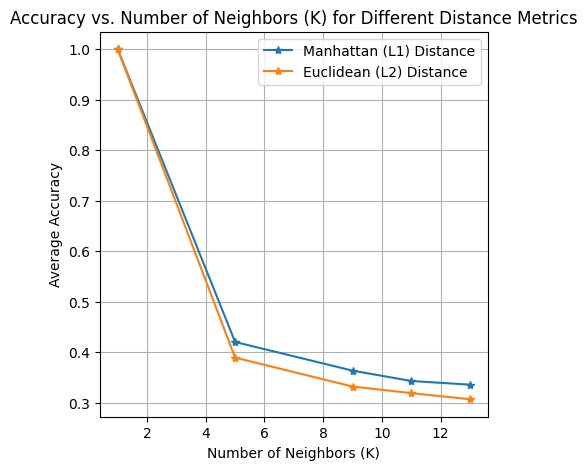

In [20]:
plt.figure(figsize=(5, 5))

plt.plot(k_values, list(average_accuracy_manhattan.values()), marker='*', label='Manhattan (L1) Distance')
plt.plot(k_values, list(average_accuracy_euclidean.values()), marker='*', label='Euclidean (L2) Distance')

plt.title('Accuracy vs. Number of Neighbors (K) for Different Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)

plt.show()

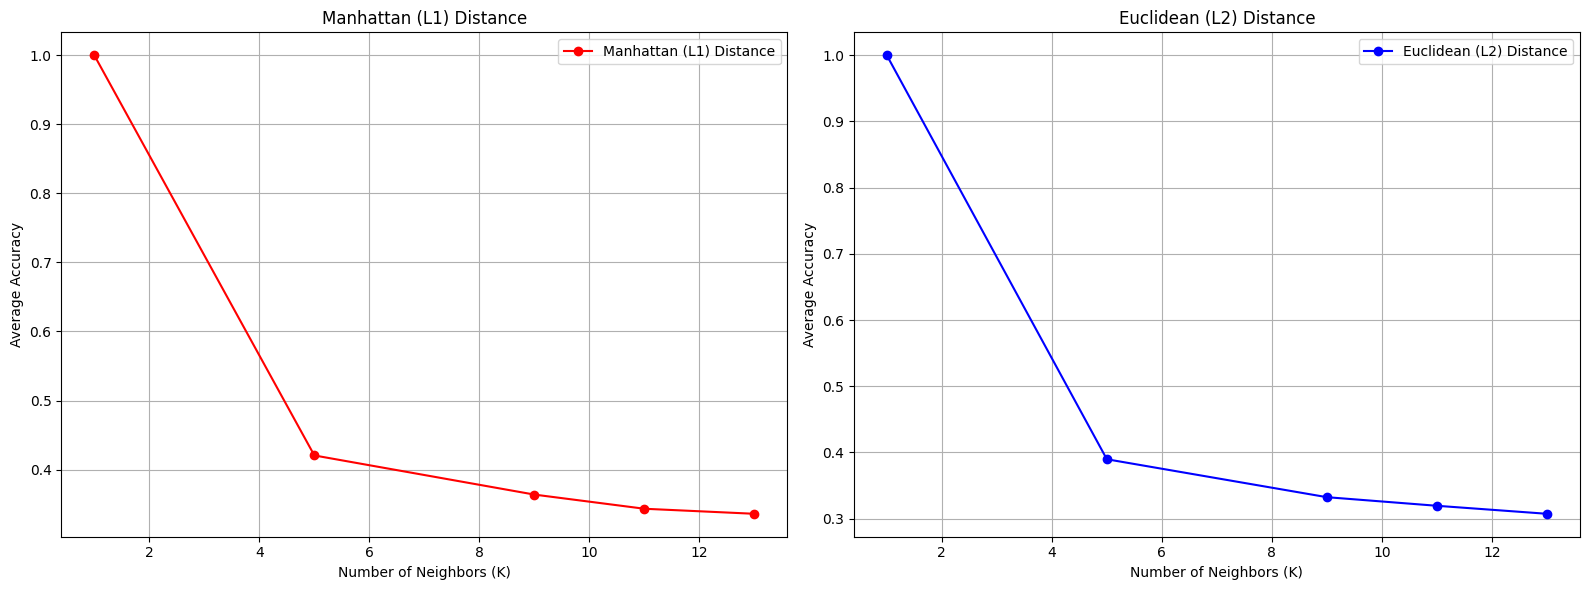

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(k_values, list(average_accuracy_manhattan.values()), marker='o', label='Manhattan (L1) Distance', color='Red')
ax1.set_xlabel('Number of Neighbors (K)')
ax1.set_ylabel('Average Accuracy')
ax1.set_title('Manhattan (L1) Distance')
ax1.grid(True)
ax1.legend()

ax2.plot(k_values, list(average_accuracy_euclidean.values()), marker='o', label='Euclidean (L2) Distance', color='blue')
ax2.set_xlabel('Number of Neighbors (K)')
ax2.set_ylabel('Average Accuracy')
ax2.set_title('Euclidean (L2) Distance')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [22]:
if average_accuracy_manhattan[k] > average_accuracy_euclidean[k]:
    print("- Manhattan distance outperforms Euclidean distance for the dataset.")
elif average_accuracy_euclidean[k] > average_accuracy_manhattan[k]:
    print("- Euclidean distance outperforms Manhattan distance for the dataset.")
else:
    print("- Manhattan and Euclidean distances perform equally well for the dataset.")

- Manhattan distance outperforms Euclidean distance for the dataset.


**Discussion:**
The results indicate the average accuracy for both Manhattan (L1) and Euclidean (L2) distances with varying values of K in the k-nearest neighbors (k-NN) algorithm.


*   **K-Value Impact on Accuracy**:For K = 1, both Manhattan and Euclidean distances achieved perfect accuracy (1.0). This is not surprising since, with K = 1, the model is essentially memorizing the training data. However, this result might not generalize well to unseen data.


*  **Manhattan (L1) vs. Euclidean (L2):** The accuracy of Manhattan distance is consistently higher than that of Euclidean distance for all K values. This suggests that, in this particular context, Manhattan distance performs better.
Manhattan distance is known for being more robust to outliers and is often preferred when dealing with high-dimensional data. In image classification, it might be better suited for distinguishing between classes when features are not well-behaved, and image characteristics can be more complex.



*   **Limitations and Potential Improvements:** The choice of K is critical. With K = 1, the model overfits, while larger K values might result in underfitting. A more thorough hyperparameter search for K might yield better results








